<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/tnj_on_going.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
def Search_Some(dataset,some):
  d={}
  for col in list(dataset.columns):
    rows = []
    flage = 0
    for row in range(dataset.shape[0]):
      if str(dataset[col][row]) == some:
        rows.append(row)
        flage = 1
    if flage ==1:
      d[col] = rows
  
  return d


def divide_dataset(dataset,numOrper,random_state = 0):

  rows,cols = dataset.shape

  if random_state == 0:
    if type(numOrper) == int:
      return dataset.iloc[:numOrper,:]
    else:
      return dataset.iloc[:int(rows*(numOrper)),:]
  else:
    import random
    if type(numOrper) == int:
      l_r = random.sample(range(0, rows), numOrper)
    else:
      l_r = random.sample(range(0, rows), int(rows*(numOrper)))
    return dataset.iloc[l_r,:]



def fun1(X,Y,test_size):
    rows=X.shape[0]
    train_size=1-test_size
    train=int(rows*train_size)
    
    f=X['Subject'][train]
    count1=0
    index1=train    
    while X['Subject'][index1]==f:
        index1-=1
        count1+=1
    index2=train+1
    count2=0
    while X['Subject'][index2]==f:
        index2+=1
        count2+=1

    if count1>count2:
        train+=count2
    else:
        train-=count1

    test=rows-train
    print('Train Subject start and end:',X['Subject'][0],'To',X['Subject'][train])
    print('Test Subject start and end:',X['Subject'][train+1],'To',X['Subject'][rows-1])
    print('Train Percentage:',train/rows)
    X_train= X[:train+2]
    X_test= X[train+1:]
    Y_train = Y[:train+2]
    Y_test = Y[train+1:]
    return X_train,X_test,Y_train,Y_test

  

def fun2(X,Y,test_size,feature="Subject"):

    f=Y.value_counts()
    rows=X.shape[0]
    talika=[]
    count=0
    for i in f:
        talika.append(i)
    train_size=1-test_size
    start=0

    switch=False

    key=0
    for i in talika :

        train=start+int(i*train_size)
        f= X[feature][train]
        count1=0
        count2=0
        index1=train
        index2=train+1
        count2=0
        end=start+i-1
        
        while X[feature][index1]==f:
            if index1<start:
                break
            index1-=1
            count1+=1
            
            
        while X[feature][index2]==f:
            if index2>end:
                break
            index2+=1
            count2+=1

        if count1>=count2:
            train+=count2
        else:
            train-=count1
        
        
        if switch == False:
            X_train= X[start:train+1]
            X_test= X[train+1:end]
            Y_train = Y[start:train+1]
            Y_test = Y[train+1:end]
            switch=True

        else:
            X_train=pd.concat([X_train, X[start:train+1]], ignore_index=True)
            X_test=pd.concat([X_test, X[train+1:end+1]], ignore_index=True)
            Y_train=pd.concat([Y_train, Y[start:train+1]], ignore_index=True)
            Y_test=pd.concat([Y_test, Y[train+1:end+1]], ignore_index=True)

        start=start+i
        key+=1

    print('Train Percentage:',X_train.shape[0]/rows)

    return X_train,X_test,Y_train,Y_test

#numpy and pandas

In [3]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

df = pd.read_excel('/content/drive/MyDrive/Tanjila_mam/DS-Healthcare_version_2.xlsx')
target="Type"

#Data Spliting


##Divide dataset into small part
<font color = 'coral'>the parameters `(dataset, number of row in int/percent in float, random(1) or not(0))`</font>

In [ ]:
dataset = divide_dataset(df,30000,1)
dataset[target].value_counts()

ischemic      19607
healthy        9026
arrhythmic     1367
Name: Type, dtype: int64

##Use the full dataset

In [4]:
dataset = df

In [5]:
dataset.shape

(888817, 13)

In [6]:
dataset.head()

,Subject,Type,Cycle,Time,RR-I,HR,R-H,P-H,QRS,PRQ,QT,QTC,ST
0,E1,ischemic,1,1.072,0.932,64.377682,3.305,3.810,0.088,0.160,0.384,0.397762,0.296
1,E1,ischemic,2,2.004,1.004,59.760956,3.285,3.810,0.100,0.160,0.640,0.638724,0.540
2,E1,ischemic,3,3.008,0.996,60.240964,3.340,3.830,0.128,0.148,0.628,0.629260,0.500
3,E1,ischemic,4,4.004,1.016,59.055118,3.325,3.810,0.108,0.172,0.388,0.384933,0.280
4,E1,ischemic,5,5.020,0.972,61.728395,3.290,3.765,0.100,0.160,0.372,0.377320,0.272


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888817 entries, 0 to 888816
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Subject  888817 non-null  object 
 1   Type     888817 non-null  object 
 2   Cycle    888817 non-null  int64  
 3   Time     888817 non-null  float64
 4   RR-I     888817 non-null  float64
 5   HR       888817 non-null  float64
 6   R-H      888817 non-null  float64
 7   P-H      888817 non-null  float64
 8   QRS      888817 non-null  float64
 9   PRQ      888817 non-null  float64
 10  QT       888817 non-null  float64
 11  QTC      888817 non-null  float64
 12  ST       888817 non-null  float64
dtypes: float64(10), int64(1), object(2)
memory usage: 88.2+ MB


In [8]:
dataset.describe()

,Cycle,Time,RR-I,HR,R-H,P-H,QRS,PRQ,QT,QTC,ST
count,888817.000000,888817.000000,888817.000000,888817.000000,888817.000000,888817.000000,888817.000000,888817.000000,888817.000000,888817.000000,888817.000000
mean,4126.559529,3460.632469,0.880424,72.455524,1.523498,0.549044,0.096488,0.167558,0.415036,0.446967,0.333215
std,2754.570022,2092.184813,0.216733,18.507293,4.283009,3.948226,0.026725,0.032679,0.069354,0.058741,0.067958
min,1.000000,0.620000,0.208000,15.243902,-12.500000,-10.461430,0.032000,0.000000,0.076000,0.114057,0.008000
25%,1790.000000,1588.308000,0.716000,58.139535,-0.930000,-1.710000,0.080000,0.144000,0.376000,0.411100,0.296000
50%,3867.000000,3416.920000,0.860000,69.767440,0.710000,-0.043950,0.092000,0.164000,0.408000,0.435980,0.332000
75%,6045.000000,5258.416000,1.032000,83.798883,2.490000,1.885000,0.108000,0.188000,0.444000,0.467451,0.364000
max,14969.000000,7291.732000,3.936000,288.461539,15.572000,16.380000,1.636000,0.460000,1.708000,1.743220,0.876000


#Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

classes = np.array(sorted(list(set(dataset[target]))))
print("Before encoding: ",classes)
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])
print("After encoding:",set(dataset[target]))

Before encoding:  ['arrhythmic' 'healthy' 'ischemic']
After encoding: {0, 1, 2}


In [10]:
#from label encoder the actual values were changed 
classes_dict={
    0: "arrhythmic",
    1: "healthy",
    2: "ischemic"
}

#Dataset spliting to X and y

And removing unwanted columns

In [11]:
X = dataset.loc[:, dataset.columns!=target]     #removing target column (classes)
y = dataset[target]

list_of_feat = X.columns

In [12]:
X.head()

,Subject,Cycle,Time,RR-I,HR,R-H,P-H,QRS,PRQ,QT,QTC,ST
0,E1,1,1.072,0.932,64.377682,3.305,3.810,0.088,0.160,0.384,0.397762,0.296
1,E1,2,2.004,1.004,59.760956,3.285,3.810,0.100,0.160,0.640,0.638724,0.540
2,E1,3,3.008,0.996,60.240964,3.340,3.830,0.128,0.148,0.628,0.629260,0.500
3,E1,4,4.004,1.016,59.055118,3.325,3.810,0.108,0.172,0.388,0.384933,0.280
4,E1,5,5.020,0.972,61.728395,3.290,3.765,0.100,0.160,0.372,0.377320,0.272


#Dataset spliting for training and testing

##Using sklearn.model_selection 

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
y_train.value_counts()

2    156540
1     72476
0     10984
Name: Type, dtype: int64

##Using Custom Fun1

In [ ]:
X_train,X_test,y_train,y_test = subject_train_test_split(X,y,test_size=0.2)

Train Subject start and end: E1 To F20
Test Subject start and end: F21 To M28
Train Percentage: 0.8027152945994507


In [ ]:
print("Train Y:")
print(y_train.value_counts())

print()

print("Test Y:")
print(y_test.value_counts())

2    581219
1    132250
Name: Type, dtype: int64

##Using Custom Fun2

In [13]:
X_train,X_test,y_train,y_test = fun2(X,y,test_size=0.2)

Train Percentage: 0.8002839729663137


In [14]:
print("Train Y:")
print(y_train.value_counts())

print()

print("Test Y:")
print(y_test.value_counts())

Train Y:
2    464402
1    214225
0     32679
Name: Type, dtype: int64

Test Y:
2    116816
1     53135
0      7559
Name: Type, dtype: int64


You can test If there is any mixing of subject in training and  testing....<font color = 'red'>Caution: It will be time consuming.</font>

In [ ]:
"""train = list(X_train["Subject"])
test = list(X_test["Subject"])

dup = []

for i in test:
  if i in train:
    dup.append(i)

print(dup)"""

'train = list(X_train["Subject"])\ntest = list(X_test["Subject"])\n\ndup = []\n\nfor i in test:\n  if i in train:\n    dup.append(i)\n\nprint(dup)'

#Removing Unnecessary Columns

In [15]:
X_train = X_train.loc[:, X_train.columns!="Subject"]              #removing 'Subjec' column
X_train = X_train.loc[:, X_train.columns!="Cycle"]                #removing 'Cycle' column
X_train = X_train.loc[:, X_train.columns!="Time"]                 #removing 'Time' column if you want, un-comment it

X_test = X_test.loc[:, X_test.columns!="Subject"]              #removing 'Subjec' column
X_test = X_test.loc[:, X_test.columns!="Cycle"]                #removing 'Cycle' column
X_test = X_test.loc[:, X_test.columns!="Time"]                 #removing 'Time' column if you want, un-comment it



#Dataset Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train =  scaler.transform(X_train)

scaler = StandardScaler()
scaler.fit(X_test)
X_test =  scaler.transform(X_test)

#Dataset Balancing

##Over Sampling

In [17]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train, y_train= smote.fit_resample(X_train, y_train)

#new_dataset=pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Under Sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_train, y_train = rus.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

0    156540
1    156540
2    156540
Name: Type, dtype: int64

#Training 

##RandomForest

###With Default parameters

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(n_jobs = -1)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


[[   15    35  7509]
 [   16  1737 51382]
 [16417 10854 89545]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7559
           1       0.14      0.03      0.05     53135
           2       0.60      0.77      0.68    116816

    accuracy                           0.51    177510
   macro avg       0.25      0.27      0.24    177510
weighted avg       0.44      0.51      0.46    177510

Accurecy:  0.5143203199819728
CPU times: user 12min 31s, sys: 600 ms, total: 12min 32s
Wall time: 3min 21s


###Tunning <i>n_estimators</i>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=500
k_range = range (50,N+1,50)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = RandomForestClassifier(n_estimators=k,random_state=0,n_jobs = -1)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

  0%|          | 0/10 [00:00<?, ?it/s]

50/500 round completed......................... Accurecy: 0.5189566784969861
100/500 round completed......................... Accurecy: 0.5177736465551237
150/500 round completed......................... Accurecy: 0.5157624922539575
200/500 round completed......................... Accurecy: 0.5125908399526787
250/500 round completed......................... Accurecy: 0.5136499352149174


###Tunning <i>max_depth</i>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = RandomForestClassifier(max_depth=k,random_state=0,n_jobs = -1)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)


###Result for best estimator

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,n_jobs = -1)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


###Result for best depth

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,n_jobs = -1)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


###Results for best estimator and best depth

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(max_depth=best_depth,n_estimators=best_estimator,n_jobs = -1)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


[[ 212    1    9]
 [   3 1539   18]
 [  30   24 3164]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       222
           1       0.98      0.99      0.99      1560
           2       0.99      0.98      0.99      3218

    accuracy                           0.98      5000
   macro avg       0.95      0.97      0.96      5000
weighted avg       0.98      0.98      0.98      5000

Accurecy:  0.983


##GradientBoosting

###With Default Parameter

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

grad_default = GradientBoostingClassifier(random_state=0)
grad_default.fit(X_train, y_train)
y_pred = grad_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[    8     1  7550]
 [   13   952 52170]
 [20015 11334 85467]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7559
           1       0.08      0.02      0.03     53135
           2       0.59      0.73      0.65    116816

    accuracy                           0.49    177510
   macro avg       0.22      0.25      0.23    177510
weighted avg       0.41      0.49      0.44    177510

Accurecy:  0.48688524590163934


###Tunning n_estimator

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=500
k_range = range (100,N+1,100)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

###Tunning for max_depth

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)
     

  0%|          | 0/50 [00:00<?, ?it/s]

1/50 round completed......................... Accurecy: 0.49973522618444033
2/50 round completed......................... Accurecy: 0.4956171483296716
3/50 round completed......................... Accurecy: 0.48688524590163934
4/50 round completed......................... Accurecy: 0.4663737254239198
5/50 round completed......................... Accurecy: 0.4563686552870261


###Result for best Estimator

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grad_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
grad_estimator.fit(X_train, y_train)
y_pred = grad_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

###Result for best depth

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grad_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
grad_depth.fit(X_train, y_train)
y_pred = grad_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

###Result for All

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier

grad_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
grad_all.fit(X_train, y_train)
y_pred = grad_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

##XGBoosting

###With Default Parameter

In [ ]:
import xgboost as xgb
xgb_default = xgb.XGBClassifier()
xgb_default.fit(X_train,y_train)
y_pred = xgb_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

###Tunning n_estimator

In [ ]:

import xgboost as xgb
from sklearn.metrics import accuracy_score
N=1500
k_range = range (100,N+1,100)
scores={}
scores_list = []
for k in tqdm(k_range):
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

###Tunning max_depth

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

###Result for best estimator

In [ ]:
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train,y_train)
y_pred = xgb_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

###Result for best depth

In [ ]:
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train,y_train)
y_pred = xgb_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

###Result for All

In [ ]:
import xgboost as xgb
xgb_all = xgb.XGBClassifier(max_depth=best_depth,n_estimators=best_estimator,random_state=0)
xgb_all.fit(X_train,y_train)
y_pred = xgb_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

##AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_deafult = AdaBoostClassifier()
ada_deafult.fit(X_train,y_train)
y_pred = ada_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

###Tunning n_estimator

In [ ]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
N=1500
k_range = range (100,N+1,100)
scores={}
scores_list = []
for k in tqdm(k_range):
  ada_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  ada_classifier.fit(X_train, y_train)
  y_pred=ada_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

###Result n_estimator

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_estimator = AdaBoostClassifier(n_estimators = best_estimator)
ada_estimator.fit(X_train,y_train)
y_pred = ada_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

##CatBoost

In [19]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 18.5 MB/s eta 0:00:00


In [20]:
from catboost import CatBoostRegressor

cat_deafult = CatBoostRegressor()
cat_deafult.fit(X_train,y_train)
y_pred = cat_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

Learning rate set to 0.128509
0:	learn: 0.7558008	total: 174ms	remaining: 2m 54s
1:	learn: 0.7046982	total: 281ms	remaining: 2m 20s
2:	learn: 0.6611737	total: 385ms	remaining: 2m 8s
3:	learn: 0.6231346	total: 484ms	remaining: 2m
4:	learn: 0.5855998	total: 590ms	remaining: 1m 57s
5:	learn: 0.5593522	total: 683ms	remaining: 1m 53s
6:	learn: 0.5324615	total: 779ms	remaining: 1m 50s
7:	learn: 0.5102849	total: 883ms	remaining: 1m 49s
8:	learn: 0.4905813	total: 982ms	remaining: 1m 48s
9:	learn: 0.4773017	total: 1.09s	remaining: 1m 48s
10:	learn: 0.4629301	total: 1.19s	remaining: 1m 46s
11:	learn: 0.4516258	total: 1.29s	remaining: 1m 46s
12:	learn: 0.4424980	total: 1.39s	remaining: 1m 45s
13:	learn: 0.4341156	total: 1.49s	remaining: 1m 44s
14:	learn: 0.4257930	total: 1.58s	remaining: 1m 43s
15:	learn: 0.4206282	total: 1.67s	remaining: 1m 42s
16:	learn: 0.4137146	total: 1.78s	remaining: 1m 42s
17:	learn: 0.4083677	total: 1.89s	remaining: 1m 43s
18:	learn: 0.4029776	total: 2.03s	remaining: 1m 4

ValueError: ignored

###Tunning iteration

In [ ]:

from catboost import CatBoostRegressor
from sklearn.metrics import accuracy_score
N=1000
k_range = range (100,N+1,100)
scores={}
scores_list = []
for k in tqdm(k_range):
  cat_classifier = xgb.XGBClassifier(iterations=k,random_state=0)
  cat_classifier.fit(X_train, y_train)
  y_pred=cat_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_iteration=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_iteration)

###Tunning depth

In [ ]:

from catboost import CatBoostRegressor
from sklearn.metrics import accuracy_score
N=100
k_range = range (100,N+1,10)
scores={}
scores_list = []
for k in tqdm(k_range):
  cat_classifier = xgb.XGBClassifier(depth=k,random_state=0)
  cat_classifier.fit(X_train, y_train)
  y_pred=cat_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

###Result best ieration

In [ ]:
from catboost import CatBoostRegressor

cat_iteration = CatBoostRegressor(iterations = best_iteration)
cat_iteration.fit(X_train,y_train)
y_pred = cat_iteration.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

###Result depth

In [ ]:
from catboost import CatBoostRegressor

cat_depth = CatBoostRegressor(depth = best_depth)
cat_depth.fit(X_train,y_train)
y_pred = cat_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

###Result all

In [ ]:
from catboost import CatBoostRegressor

cat_all = CatBoostRegressor(iterations = best_iteration, depth = best_depth)
cat_all.fit(X_train,y_train)
y_pred = cat_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

#Set the model to be explained and visualization

<font color='coral'>Caution:</font> Please set the <i>trained_model</i> before proceeding

In [ ]:
trained_model = rf_default
#trained_model = rf_depth
#trained_model = rf_estimator
#trained_model = rf_all


#trained_model = grad_default
#trained_model = grad_estimator
#trained_model = grad_depth
#trained_model = grad_all


#trained_model = xgb_default
#trained_model = xgb_estimator
#trained_model = xgb_depth
#trained_model = xgb_all

#trained_model = ada_deafult
#trained_model = ada_estimator

#trained_model = cat_deafult

#trained_model = cat_iteration
#trained_model = cat_depth
#trained_model = cat_all

#Visualization

##ROC CURVE

In [ ]:
!pip install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.0 MB/s eta 0:00:00


In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

def ploty_ROC_1(model,lebel_dict):

  y_scores = model.predict_proba(X_test)

  y_onehot = pd.get_dummies(y_test, columns=model.classes_)

  fig = go.Figure()
  fig.add_shape(
      type='line', line=dict(dash='dash'),
      x0=0, x1=1, y0=0, y1=1
  )

  for i in range(y_scores.shape[1]):
      y_true = y_onehot.iloc[:, i]
      y_score = y_scores[:, i]

      fpr, tpr, _ = roc_curve(y_true, y_score)
      auc_score = roc_auc_score(y_true, y_score)
      name = f"{lebel_dict[y_onehot.columns[i]]} (AUC={auc_score:.2f})"
      fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

  fig.update_layout(
      xaxis_title='False Positive Rate',
      yaxis_title='True Positive Rate',
      yaxis=dict(scaleanchor="x", scaleratio=1),
      xaxis=dict(constrain='domain'),
      width=1000, height=1000,
      font=dict(
        family="Courier New, monospace",
        size=20,
        color="BLack"
    ),
    legend=dict(
        x=0.67,
        y=0.05,
        traceorder="reversed",
        title_font_family="Times New Roman",
        font=dict(
            family="Courier New, monospace",
            size=20,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="White",
        borderwidth=2
    )
  )
  fig.show()



ploty_ROC_1(trained_model,classes_dict)

#Confusion Matrix

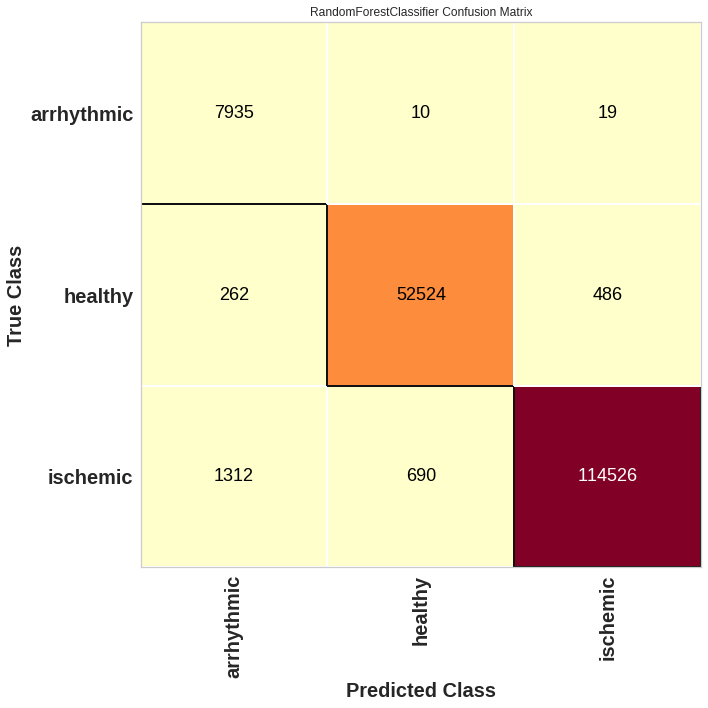

--------------------
--------------------


In [ ]:
import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.dates as dates



def Conf_Mat(X_,y_,attb,model,cls):


  fig = plt.figure(figsize=(attb["Fig Height"],attb["Fig weidth"]))
  ax = fig.add_subplot(111)

  cm = ConfusionMatrix(model, classes=cls,fontsize=attb["Confusion Matrix Inner Fontsize"],ax=ax)
  cm.fit(X_train, y_train)
  cm.score(X_, y_)
      
  cm.ax.set_xlabel("Predicted Class", fontsize=attb["X Axis Fontsize"],fontweight="bold")
  cm.ax.set_ylabel("True Class", fontsize=attb["Y Axis Fontsize"],fontweight="bold")
  cm.ax.xaxis.set_tick_params(labelsize=attb["X Label Fontsize"])
  cm.ax.yaxis.set_tick_params(labelsize=attb["Y Label Fontsize"])
  for label in ax.get_xticklabels():
    label.set_fontweight(550)
  for label in ax.get_yticklabels():
    label.set_fontweight(550)
  
  plt.savefig("Testing_confusion_mat"+str(model)+".png")
  cm.show()
  print("--------------------")
  print("--------------------")


attributes={
   "Fig Height": 10,
   "Fig weidth": 10, 
    
  "Y Axis Fontsize" : 20,
  "X Axis Fontsize" : 20,

  "Y Label Fontsize" : 20,
  "X Label Fontsize" : 20,

  "Confusion Matrix Inner Fontsize": 18


}


Conf_Mat(X_test,y_test,attributes,trained_model,classes)
     
     

#XAI

##SHAP (SHapley Additive exPlanations)

<font color='coral'> Docmumentation: </font> <a href = "https://shap.readthedocs.io/en/latest/#:~:text=SHAP%20(SHapley%20Additive%20exPlanations)%20is,papers%20for%20details%20and%20citations).">Click Here</a>

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 9.5 MB/s eta 0:00:00


###Local Explainer

In [ ]:
import shap
shap.initjs()

explainer_local = shap.TreeExplainer(trained_model)

start_index = 1      #set the starting index of the row to be explained
end_index = 10       #set the ending index of the row to be explained


shap_values = explainer_local.shap_values(X_test[start_index:end_index])

In [ ]:
shap.initjs()
# Force plot

shap.force_plot(explainer_local.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index],feature_names = list_of_feat) # for values

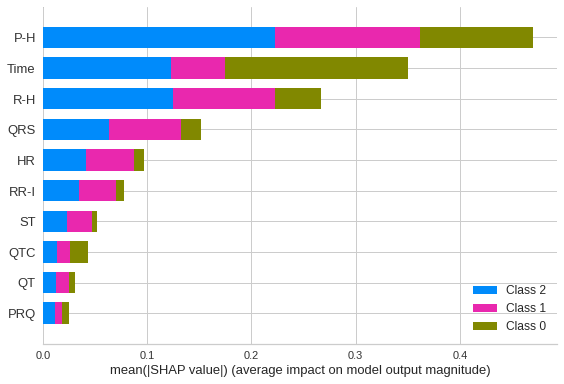

In [ ]:
shap.summary_plot(shap_values, X_test,feature_names=list_of_feat)

###Global Explainer

In [ ]:
def SHAP_EXP(model,graph_feat):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_test)

  shap_values1 = explainer(X_test)
  features_names=list_of_feat

  if 'Subjects' in features_names:
    features_names.pop(0)


  shap.plots.bar(shap_values1,max_display=graph_feat["max_display"])

  print("---------------------")

  shap.summary_plot(shap_values1,max_display=graph_feat["max_display"],feature_names=features_names)

  print("---------------------")

  print("Local Explaination")
  shap.plots.waterfall(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])


  print("---------------------")

  shap.plots.bar(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])

Models:  RandomForestClassifier()


Exact explainer: 5001it [1:15:42,  1.10it/s]


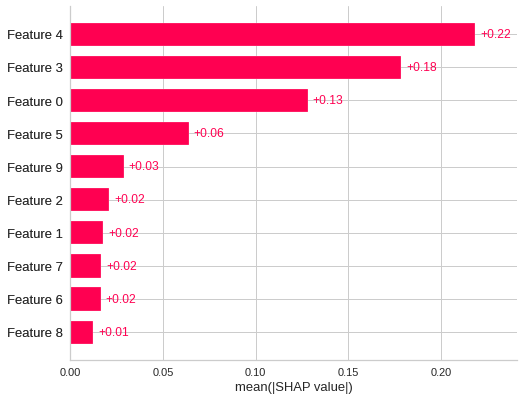

---------------------


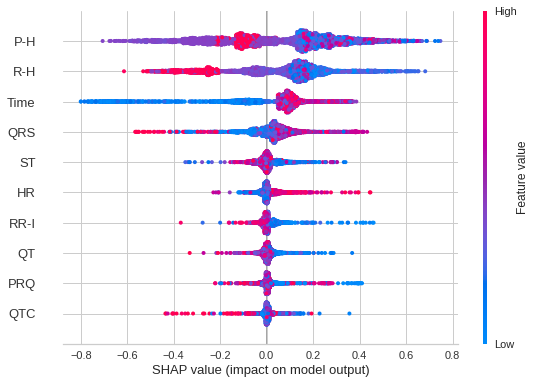

---------------------
Local Explaination


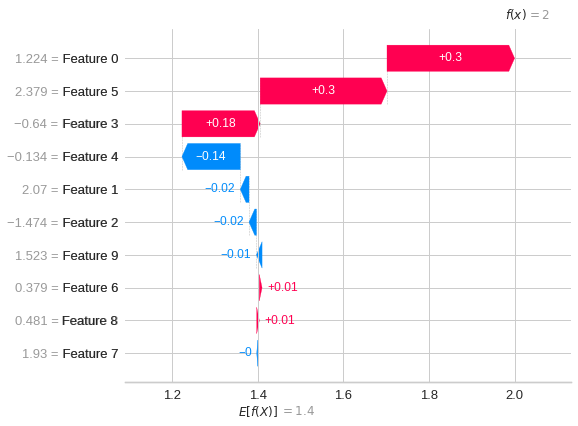

---------------------


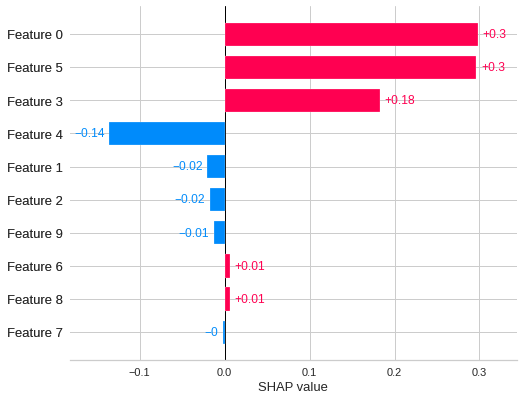

In [ ]:

graph_feat={
    "max_display":20,
    "shap_values Index":2
}


SHAP_EXP(trained_model,graph_feat)
    

##LIME
<font color='coral'> Docmumentation: </font> <a href = "https://pypi.org/project/lime/">Click Here</a>


In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=45ada3f8f10f472428aec80d47f9b3051056debc4302eeb3adb82eddb60dbc0a
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [ ]:
import lime
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=list_of_feat,
    class_names=classes,
    mode='classification'
)

In [ ]:
explain_row = 100

In [ ]:
print("Actual value of test row: ", classes_dict[y_test.iloc[100]])

Actual value of test row:  healthy


1

In [ ]:
exp = explainer.explain_instance(X_test[explain_row],                  #index of row, which will be explained
                                 trained_model.predict_proba,
                                 num_features=6,              # how many features will be explained
                                 top_labels=3)                # number of classes        

exp.show_in_notebook(show_table=True, show_all=True)

In [ ]:
from IPython.display import HTML

html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(trained_model)+"_explanation.html")
     